In [1]:
%load_ext autoreload
%autoreload 2

# One Dimensional Transport equation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

import diffuconpy as dc
import animations

The One dimensional Convection (Advection) Model, or Transport equation, is governed by the following pde:

$$\frac{\partial u}{\partial t} = c \frac{\partial u}{\partial x}$$

Which initial condition:

$$u(x, 0) = \sin\left(\frac{2\pi}{5}x\right)$$

Solving this model numerically one would have to discretize this model. One such discretization is the "Upwind Method" or "Centered difference". 

$$\therefore u_{i}^{n+1} = u_{i}^{n} + \left(c\frac{\Delta t}{2\Delta x}\right)[u_{i+1}^{n} - u_{i-1}^{n}]$$

See source code `diffuconpy` to see the full implementation of this discretization.

To model the Advection Equation, one must consider the number of step the model will advance in time `Nt = 250` and space `Nx = 1500`. Also $\Delta t$ which is `dt = 1/Nt` in the code below and $\Delta x$ which is `dx = (5-(-5)/Nx)`. the boundary points on this plot are $-5$ and $5$, at which the initial function is $0$. the Convection coefficient `convection` is $0.75$.

In [3]:
# Numbers of space and time steps
Nt = 900
Nx = 1500

# Space and time step size
dt = (2-0)/Nt
dx = (5-(-5))/Nx

# Convection Coefficient (speed of the distribution)
convection = 0.75

# Setting up the initial condition
x = np.arange(-5, 5, dx)

# Initial Array
init = 3*np.sin(((2*np.pi)/5)*x)

## Solving the PDE and Calculating its CLF value

In [4]:
# Solving the diffusion equation
def solve(Nt, Nx, dt, dx, convection, init):
    transport = dc.convection_1dims(Nt, Nx, dt, dx, convection, init)
    model = transport.solve()

    return model.solution


In [5]:
density = solve(Nt, Nx, dt, dx, convection, init)

CLF = np.abs(convection*(dt/dx))

print(CLF)

0.25


## Plotting the first time step

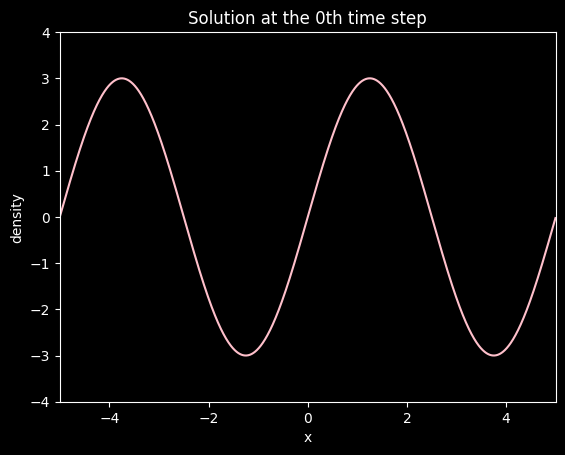

In [6]:
# Plotting the 0th time step state
plt.figure(0)
ax = plt.axes(xlim=(-5, 5), ylim=(-4, 4)) # left bound -5 and right bound 5
ax.plot(x, density[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('density')
plt.show()


## Animating the Solution

In [7]:
# Setting up the animation
FPS = 60
FRN = 250
FILE = './img/convection_in_1_dimension.gif'

# Calling the animation_() function defined in the previous cell.
# See the animation at ./example-img/convection_in_1_dimension.gif
animations.animation_1(
    solution=density, 
    X=x, 
    xlab='x', 
    ylab='density', 
    title='Solution to Transport Equation', 
    color='pink', 
    xlim_=(-5, 5), 
    ylim_=(-4, 4), 
    fps=FPS, 
    frn=FRN, 
    filename=FILE
    )

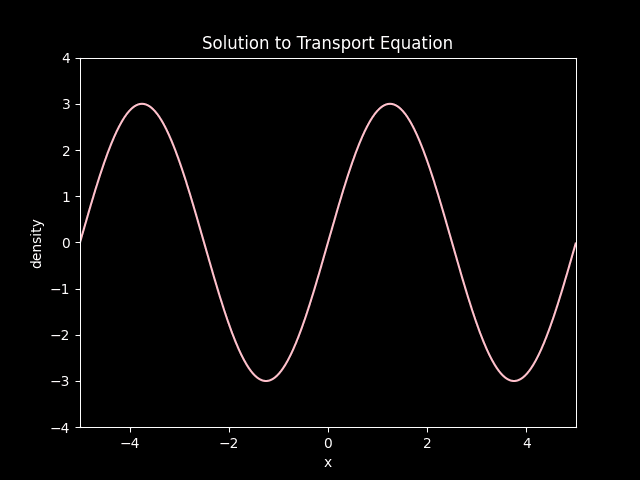

Convection of a sinwave at a speed of 0.75.